[Back to assignment 9](_Oving9.ipynb)
# Plotting temperatures

**Learning goals:**

- Reading from file
- Plotting data

**Starting Out with Python:**

- Ch. 6.1 (p. 260,->): Introduction to File Input and Output
- Ch. 6.2: Using Loops to Process Files
- Ch. 7.10: Plotting List Data with the matplotlib Package

We are going to explore the contents of the file `Trondheim_temperatures_list.txt`. The data contained in this file will be read and then plotted. The text file contains four lines of text (although if you open it, you may see more lines than this due to text breaking in your reading application. The first line contains the 365 dates from 01.01.2017 to 31.12.2017. The second line contains the 365 mean temperatures on these dates as measured at Voll, Trondheim. The third line contains the 365 minimum temperatures on these dates, and the last line the maximum temperatures measured on these dates. All the data was taken from official statistics at http://eklima.met.no.

The three lines containing temperature data consist of floating point numbers separated by a single whitespace.

### a)
Open the text file in Python and print the contents to check that the reading works correctly.

In [3]:
 with open('Trondheim_temperatures_list.txt', 'r') as f:
        for line in f:
            print(line)

01.01.2017 02.01.2017 03.01.2017 04.01.2017 05.01.2017 06.01.2017 07.01.2017 08.01.2017 09.01.2017 10.01.2017 11.01.2017 12.01.2017 13.01.2017 14.01.2017 15.01.2017 16.01.2017 17.01.2017 18.01.2017 19.01.2017 20.01.2017 21.01.2017 22.01.2017 23.01.2017 24.01.2017 25.01.2017 26.01.2017 27.01.2017 28.01.2017 29.01.2017 30.01.2017 31.01.2017 01.02.2017 02.02.2017 03.02.2017 04.02.2017 05.02.2017 06.02.2017 07.02.2017 08.02.2017 09.02.2017 10.02.2017 11.02.2017 12.02.2017 13.02.2017 14.02.2017 15.02.2017 16.02.2017 17.02.2017 18.02.2017 19.02.2017 20.02.2017 21.02.2017 22.02.2017 23.02.2017 24.02.2017 25.02.2017 26.02.2017 27.02.2017 28.02.2017 01.03.2017 02.03.2017 03.03.2017 04.03.2017 05.03.2017 06.03.2017 07.03.2017 08.03.2017 09.03.2017 10.03.2017 11.03.2017 12.03.2017 13.03.2017 14.03.2017 15.03.2017 16.03.2017 17.03.2017 18.03.2017 19.03.2017 20.03.2017 21.03.2017 22.03.2017 23.03.2017 24.03.2017 25.03.2017 26.03.2017 27.03.2017 28.03.2017 29.03.2017 30.03.2017 31.03.2017 01.04.2017

### b)

Make a function get_list(line) that reads a line of text consisting of whitespace-separated floats and returns a list containing the floats. 

**Example run**

```python
line = '9.1 8.3 4.5 9.1 3.3'
print(get_list(line))
# Outputs [9.1, 8.3, 4.5, 9.1, 3.3]
```

In [9]:
def get_list(line):
    return [float(element) for element in line.split(' ')]

In [10]:
line = '9.1 8.3 4.5 9.1 3.3'
print(get_list(line))

[9.1, 8.3, 4.5, 9.1, 3.3]


#### Hint

The `str.split('char')` function will split a string into a list of strings, removing the char character. For example with `line = "Hi-my-name-is-Bertha"`, running `line = line.split('-')` gives `line = ['Hi', 'my', 'name', 'is', 'Bertha']`.

After splitting your list, use the `float()` function to convert each number to a float.

### c)
Make a function `get_data(file)` that takes as argument a file object (as created by file = open(...)) on the format of the above text file and returns a tuple `(dates, meantemps, mintemps, maxtemps)` consisting of:
- `dates`: a list strings with dates extracted from the text
- `meantemps`: a list of floats with mean temperatures extracted from the text
- `mintemps`: a list floats with of minimum temperatures extracted from the text
- `maxtemps`; a list of floats with maximum temperatures extracted from the text.

You should use the function `get_list(line)` from b) to extract the temperatures from lines 2-4 in the text file. 

In [17]:
def get_data(file):
    data = ()
    for idx, line in enumerate(file):
        if idx == 0:
            data += (line.split(' '),)
        else:
            data += (get_list(line),)
    return data

In [20]:
 with open('Trondheim_temperatures_list.txt', 'r') as f:
    data = get_data(f)
print(type(data), len(data))

<class 'tuple'> 4


#### Hint:

Use `file.readline()` to read line by line from the text file. The first line contains only dates - you can use `str.split(' ')` to get a list containing them.

### d)
Make a function plot_data(file) that takes as input a file of the same format as the above text file and plots the data. You will need to use the matplotlib.pyplot library as in exercise set 7. You should use the function from b) to extract the data, and then use the plt.plot(), plt.title(), plt.xlabel() and plt.ylabel() functions to format your figure so that it resembles the below left figure.

 

**Optional**: In addition, you can use `plt.legend(['FirstLabel','SecondLabel','ThirdLabel'])` to produce a legend in the plot that labels the three lines as seen in the below right figure. To produce the monthly labelling along the x axis, you can use the line `plt.xticks(range(15,365,31),months)` with `months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']`. This will replace the regular valuation of the x axis such that at the points corresponding to x = 15, 46, 77,... the plot function writes 'Jan', 'Feb', 'Mar',....

In [36]:
import matplotlib.pyplot as plt

def plot_data(file):
    data = get_data(file)
    
    for i in range(1, 4):
        plt.plot(range(365), data[i])
        
    plt.xlabel('Month')
    plt.ylabel('Temperature, °C')
    plt.title('Temperatures for Trondheim, 2017')
    plt.legend(['Mean','Minimum','Maximum'])
    
    plt.xticks(range(15,365,31), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

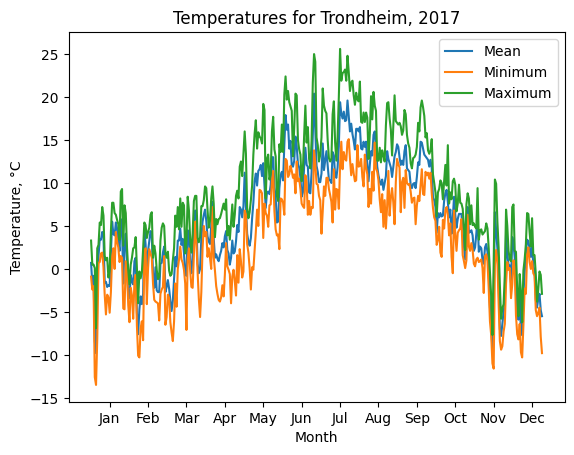

In [37]:
with open('Trondheim_temperatures_list.txt', 'r') as f:
    plot_data(f)

#### Example output (images):

Running the code 
```python
file = open("Trondheim_temperatures_list.txt","r")
plot_data(file)
```
should produce one of the following plots, depending on whether or not you add the optional part above to your code.
(Note that the x-axis in the left plot is wrong, it should be like the right plot)

Example Output from d) | Output with optional part
- | -
![img](./../Resources/Images/temperatures_nolegend.png)|![img](./../Resources/Images/temperatures.png)